# Content

## Import Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set Path
path = r'C:\Users\bwink\Downloads\Data Analytics A6'

In [14]:
# Import Data Set
# 1997 was an outlier, used far more pesticide with much lower yield primarily due to locusts
#removed zero's in production and yield. This is because the measurements are in metric tonnes, so zero values do not 
# necessarily mean absolutely nothing was produced.There are values below 1 remaining.
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'crop_yield_no97cocozero.csv'))

In [15]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Wheat,2019,Rabi,Madhya Pradesh,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423
1,Wheat,2019,Rabi,Uttar Pradesh,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533
2,Wheat,2011,Rabi,Uttar Pradesh,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333
3,Wheat,2010,Rabi,Uttar Pradesh,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222
4,Wheat,2018,Rabi,Uttar Pradesh,9855900.0,38039724,792.8,1.598627e+09,3449565.00,3.855600


In [16]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
11450,Sweet potato,1998,Whole Year,Haryana,88.0,1500,687.6000,8694.40,25.52,14.696
11451,Sweet potato,2004,Whole Year,Haryana,75.0,1500,484.6000,8125.50,15.75,18.602
11452,Garlic,2005,Whole Year,Kerala,65.0,1105,3030.9000,7794.80,13.65,17.000
11453,Sweet potato,2003,Whole Year,Haryana,77.0,1600,592.3000,7621.46,18.48,16.482
11454,Ragi,2005,Kharif,Puducherry,56.0,101,1434.5875,6715.52,11.76,1.800


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11455 entries, 0 to 11454
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             11455 non-null  object 
 1   Crop_Year        11455 non-null  int64  
 2   Season           11455 non-null  object 
 3   State            11455 non-null  object 
 4   Area             11455 non-null  float64
 5   Production       11455 non-null  int64  
 6   Annual_Rainfall  11455 non-null  float64
 7   Fertilizer       11455 non-null  float64
 8   Pesticide        11455 non-null  float64
 9   Yield            11455 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 895.1+ KB


In [8]:
df.value_counts('Crop_Year')

Crop_Year
2019    1070
2017    1062
2018    1055
2016    1028
2015     989
2013     966
2014     955
2011     899
2012     887
2009     858
2010     853
2008     839
2007     821
2006     816
2002     807
2005     803
2003     793
2004     780
2000     765
2001     743
1999     644
1998     641
2020      37
dtype: int64

In [9]:
df.value_counts('Season')

Season
Kharif         8064
Rabi           5641
Whole Year     3456
Summer         1170
Autumn          402
Winter          378
dtype: int64

In [10]:
df.value_counts('State')

State
Karnataka            1380
Andhra Pradesh       1211
West Bengal          1030
Chhattisgarh          908
Bihar                 857
Madhya Pradesh        830
Tamil Nadu            806
Uttar Pradesh         796
Gujarat               787
Uttarakhand           764
Maharashtra           752
Odisha                736
Nagaland              684
Assam                 683
Puducherry            650
Jammu and Kashmir     628
Meghalaya             623
Haryana               619
Himachal Pradesh      616
Kerala                507
Tripura               441
Manipur               434
Mizoram               400
Telangana             395
Punjab                382
Arunachal Pradesh     281
Jharkhand             270
Goa                   222
Sikkim                216
Delhi                 203
dtype: int64

In [18]:
#too many variables for facet grid, using scatter plots for now
df.value_counts('Crop')

Crop
Rice                     1096
Maize                     788
Urad                      482
Moong(Green Gram)         455
Groundnut                 419
Wheat                     402
Rapeseed &Mustard         390
Potato                    369
Sesamum                   362
Sugarcane                 346
Jowar                     335
Ragi                      316
Arhar/Tur                 305
Small millets             288
Gram                      287
Sunflower                 278
Bajra                     275
Onion                     269
Dry chillies              261
Cotton(lint)              242
Peas & beans (Pulses)     213
Horse-gram                210
Soyabean                  191
Masoor                    188
Barley                    184
Linseed                   181
Banana                    170
Other  Rabi pulses        160
Other Kharif pulses       159
Tobacco                   155
Niger seed                154
Ginger                    127
Castor seed               126
Turme

# Cleaning

In [19]:
#Will look into eliminating certain crops from list
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,11455.000000,1.145500e+04,1.145500e+04,11455.000000,1.145500e+04,1.145500e+04,11455.000000
mean,2009.165255,2.904156e+05,1.253629e+06,1288.752276,3.945974e+07,7.829436e+04,4.702515
std,6.311083,8.011423e+05,7.253255e+06,704.977091,1.123827e+08,2.278805e+05,13.412294
min,1998.000000,5.600000e+01,1.010000e+02,301.300000,6.715520e+03,7.470000e+00,0.003571
25%,2004.000000,1.300200e+04,1.405150e+04,890.800000,1.740821e+06,3.380000e+03,0.627639
50%,2009.000000,4.720000e+04,6.457400e+04,1129.500000,6.293662e+06,1.187472e+04,1.142667
75%,2015.000000,1.914915e+05,3.695185e+05,1465.100000,2.577587e+07,4.953110e+04,2.466588
max,2020.000000,1.021652e+07,1.796982e+08,6552.700000,1.754789e+09,3.780111e+06,381.420000


# Visualization

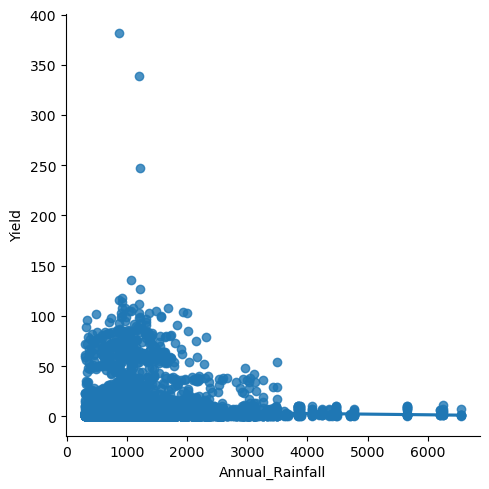

In [20]:
# Scatterplot for Rainfall and Fertilizer
scatter_RY = sns.lmplot(x = 'Annual_Rainfall', y = 'Yield', data = df)
plt.savefig('scatter_RY.png')

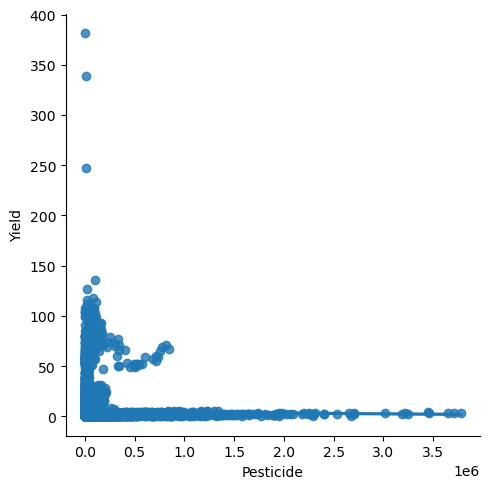

In [21]:
# Scatterplot for Pesticide and Yield
scatter_PY = sns.lmplot(x = 'Pesticide', y = 'Yield', data = df)
plt.savefig('scatter_PY.png')

In [ ]:
# Scatterplot for Rainfall and Production
scatter_RP = sns.lmplot(x = 'Annual_Rainfall', y = 'Production', data = df)
plt.savefig('scatter_RP.png')

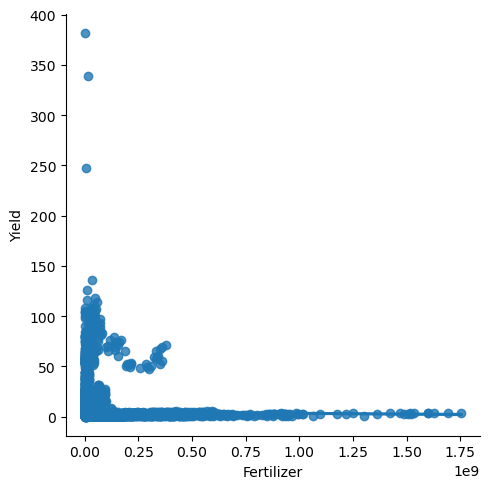

In [22]:
# Scatterplot for Fertilizer and Yield
scatter_FY = sns.lmplot(x = 'Fertilizer', y = 'Yield', data = df)
plt.savefig('scatter_FY.png')

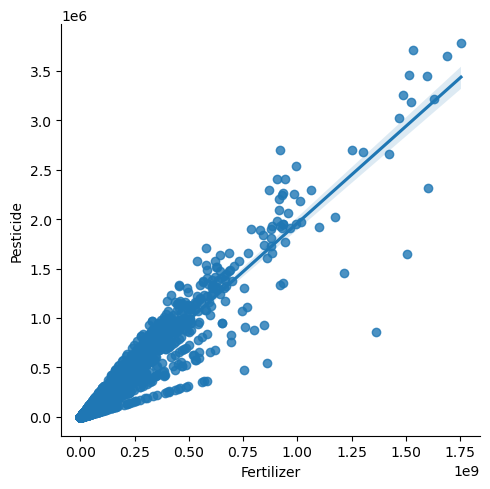

In [23]:
# Scatterplot for Fertilizer and Pesticide
scatter_FP = sns.lmplot(x = 'Fertilizer', y = 'Pesticide', data = df)
plt.savefig('scatter_FP.png')

## Hypothesis: The more fertilizer used, the more pesticide is used
#### Using this because of apparent strength of correlation as opposed to other variables

# Regression Model

In [24]:
# Reshape variables into numpy arrays
X = df['Fertilizer'].values.reshape(-1,1)
y = df['Pesticide'].values.reshape(-1,1)

In [32]:
X

array([[1.75478896e+09],
       [1.69226609e+09],
       [1.63016225e+09],
       ...,
       [9.46700000e+01],
       [9.46700000e+01],
       [5.41700000e+01]])

In [33]:
y

array([[3.78011129e+06],
       [3.64542648e+06],
       [3.21127950e+06],
       ...,
       [2.50000000e-01],
       [2.50000000e-01],
       [1.05000000e-01]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# create object
regression = LinearRegression()

In [37]:
# Fit Regression to train set
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
y_predicted = regression.predict(X_test)

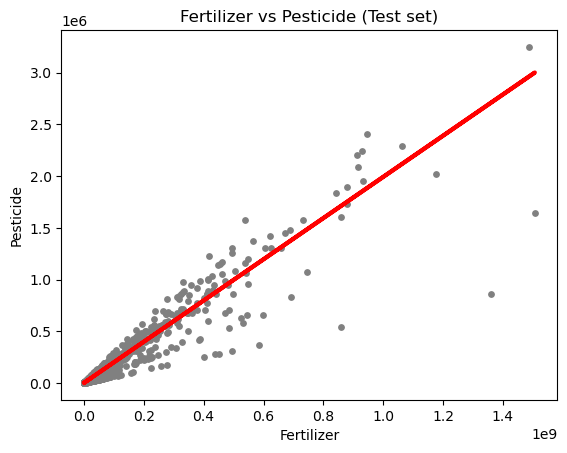

In [38]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Fertilizer vs Pesticide (Test set)')
plot_test.xlabel('Fertilizer')
plot_test.ylabel('Pesticide')
plot_test.show()

In [40]:
# assigning variables
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00199263]]
Mean squared error:  2755878108.583513
R2 score:  0.8943696393713892


## Positive relationship due to Slope
## Mean squared seems astronomical, indicating it probably isn't representative of the data
## The R2 is fairly high considering the MSE, indicating that this is approaching a good fit(?)

In [42]:
# Dataframe to compare actual and predicted values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2855.1600,2971.582874
1,46659.4800,48049.862448
2,108134.7000,89357.284132
3,245852.4000,203054.192491
4,1155.0000,1184.792391
5,6860.0700,7135.707973
6,2288.5400,4263.338972
7,260.7000,332.072617
8,10711.2600,12271.714118
9,29303.6700,28024.697949


In [43]:
#Predicting x train
y_predicted_train = regression.predict(X_train)

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00199263]]
Mean squared error:  1884592829.089704
R2 score:  0.9462015147599989


In [46]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19279.000000,1.927900e+04,1.927900e+04,19279.000000,1.927900e+04,1.927900e+04,19279.000000
mean,2009.385497,1.751390e+05,1.646975e+07,1434.394552,2.379612e+07,4.721687e+04,80.296008
std,6.318922,6.339881e+05,2.631739e+08,814.853131,8.879661e+07,1.798792e+05,881.000151
min,1998.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.365500e+03,1.361500e+03,940.700000,1.853411e+05,3.480000e+02,0.600000
50%,2010.000000,9.112000e+03,1.350100e+04,1246.200000,1.209882e+06,2.359200e+03,1.031667
75%,2015.000000,7.312150e+04,1.203230e+05,1635.900000,9.863794e+06,1.946965e+04,2.410000
max,2020.000000,1.021652e+07,6.326000e+09,6552.700000,1.754789e+09,3.780111e+06,21105.000000


## the slope again indicates a positive correlation.
## MSE is very high again, probably too high to consider representative
## R2 indicates a fairly good fit!

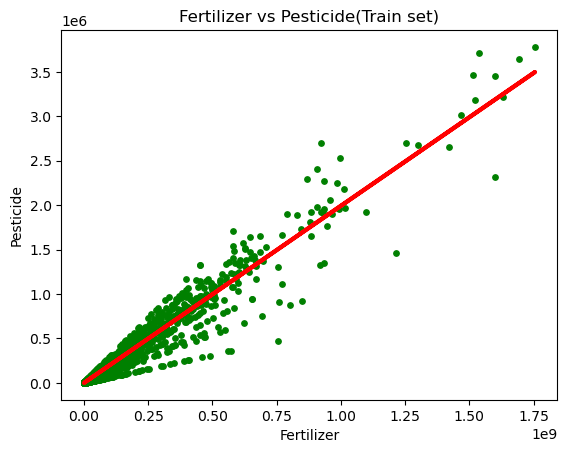

In [47]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Fertilizer vs Pesticide(Train set)')
plot_test.xlabel('Fertilizer')
plot_test.ylabel('Pesticide')
plot_test.show()

# Will possibly separate Coconuts from the list of crops to be analyzed on it's own
# India is one of the world's largest suppliers of coconuts
# All the production numbers in the tens-hundreds of millions are from coconut production